## ASSIGNMENT 2


### Part 1

Nonparametric estimation is a statistical method that allows the functional form of a fit to data to be obtained in the absence of any guidance or constraints from theory [1]. There are two kinds of nonparametric estimation techniques available:one is called **Kernel Density Estimation (KDE) or Parzen Windows** and the other is **the k-nearest neighbor-density estimate**. They are fundamentally very similar, but exhibit some different statistical properties [2].

In Part 1 you will make density estimation by using Kernel Density Estimation (Parzen) and kNN from non-parametric density estimation methods and, make classification via Bayesian aproach. In this context, you are given the train and test datasets generated from bimodal 2D Gaussian distributions for two-classes. You are expected to:

1- For each sample *x* at the test set, compute the density estimation (i.e. estimated probabilities of samples using KDE and kNN) to obtain a likelihood P(x | C), for each class C.

2- From the number of examples of each class in the training set, compute the class prior, P(C).

3- For each test point x, get an estimate for the posterior probability for each class is P(C|x)∝P(x|C)P(C). The class which maximizes this posterior is the label assigned to the point.

4-Finally, save your result for each sample with the classification labels in a csv file. 

You are expected to find the Kernel Density estimation using Gaussian Kernels (check the lecture notes for the details) with your own implementations. Make some experiments to determine the best bandwidth for your kernels. You may check your estimations using the Scikitlearn libraries; this tutorial could be helpful as a starter [3].


### Part 2 

You will make a regression analysis to the second dataset, as in your lecture notes, using M=1, M=3, M=6, and M=9. Report the error rate of the f(x) estimations in the test data of your models in a separate cell from regression coding. Tabulate your results with and without regularization. Please also provide your experiment results with different regularization parameters in your reports.

#### Note: Don't forget add comments in your codes.

[1]: https://mathworld.wolfram.com/NonparametricEstimation.html#:~:text=Nonparametric%20estimation%20is%20a%20statistical,have%20no%20meaningful%20associated%20parameters.

[2]:https://www.cs.cmu.edu/~epxing/Class/10701-08s/reading/R1-b.pdf

[3]:https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html 


# NOTE : KNN algorithms take 2 minutes to work so I added KNN to end of the code In this way we can see results of the other algorithms in 30 seconds

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
import csv

In [137]:
#Reading our datas
data1 = pd.read_csv("C:/Users/huseyin/Desktop/Part1/Class1.csv")
data2 = pd.read_csv("C:/Users/huseyin/Desktop/Part1/Class2.csv")
testdata = pd.read_csv("C:/Users/huseyin/Desktop/Part1/Test.csv")          
#Get lenght of the array to use it later
data1_len = len(data1.iloc[0])
data2_len = len(data2.iloc[0])


# Parzen Windows

In [138]:
#We define h value in here
h = 1

In [139]:
#Kg(u) function for Smooth Kernels
def u(x,h,x0,d):
    u =(x - x0)/h
    return ((1/((2*np.pi)**d/2)**(-1/2))*(np.dot(u,np.transpose(u))))

In [140]:
#Our classifier Array
classifierArrayParzen = []
#We define two arrays for save our probability values
probabilitiesdata1 = []
probabilitiesdata2 = []
probabilitydata1 = 0
sumationdata1 = 0
probabilitydata2 = 0
sumationdata2 = 0
dimension = 2
#We calculate the probability values here
for j in range(1,len(testdata.iloc[0])):
    for i in range(1,data1_len):
        sumationdata1 += u(np.array(testdata.iloc[0,j],testdata.iloc[1,j]) , h , np.array(data1.iloc[0,i],data1.iloc[1,i]),dimension)
    probabilitydata1 = (1/(data1_len * h**2)) * sumationdata1
    probabilitiesdata1.append(probabilitydata1)
        
    for i in range(1,data2_len):
        sumationdata2 += u(np.array(testdata.iloc[0,j],testdata.iloc[1,j]) , h , np.array(data2.iloc[0,i],data2.iloc[1,i]),dimension)
    probabilitydata2 = (1/(data2_len * h**2)) * sumationdata2
    probabilitiesdata2.append(probabilitydata2)
    sumationdata1 = 0    
    sumationdata2 = 0 
    
#In here we deciding the class according to probability values
for i in range (len(probabilitiesdata1)):
    if(probabilitiesdata1[i] < probabilitiesdata2[i]):
        classifierArrayParzen.append(1)
    else:
        classifierArrayParzen.append(2)    
    
classifierArrayParzen = np.array(classifierArrayParzen)
classifierParzendf = pd.DataFrame(classifierArrayParzen, columns = ["class"])
classifierParzendf.to_csv('parzen windows.csv')

# Linear Regression


In [141]:
part2Data = pd.read_csv("C:/Users/huseyin/Desktop/Part2/train.csv")
part2Test = pd.read_csv("C:/Users/huseyin/Desktop/Part2/test.csv")


In [142]:
#Choose the M values here
M = [1,3,6,9]

# #Training Our Model

In [143]:
#In regression train we train our model and show how it works on train data
def RegressionTrain(data,M):
    #We take the training data
    originalx = data["0"]
    Y = data["0.1"]
    
    #This is main regression part We calculate the X matrix with regression in here
    X = []
    for i in range (0,len(data["0"])):
        temparray = []
        temparray.append(1)
        for j in range(1,M+1):
            temparray.append(data["0"][i]**j) 
        X.append(temparray)
        
    #We transform our array to numpy
    X = np.array(X)
    Y = np.array(Y)
    
    #We train our model in here with using founded X matrix in regression(((Xt * X))**-1) * (X * Y))
    w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
    Yhat = np.dot(X, w)
    
    #We calculate square error for test data here
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    print("the r-squared for train data is:", r2)
    
    #We can see our model with orange color and original model with blue color on the training data(If you cant see any blue dot it means our predicted value is on the blue )
    ax = plt.subplot()
    ax.scatter(originalx, Y, color="blue", marker="o")
    ax2 = ax.twinx()
    ax2.scatter(originalx, Yhat,color="orange",marker="o")
    title = "Train Data M = "+str(M)
    plt.title(title)
    plt.show()
    return w

# #Testing Our Model

In [144]:
#In regression test we only give x values on the test data looking for  relationship between predicted values and original values
def RegressionTest(data,M,w):
    #We take the training data
    originalx = data["0"]
    Y = data["0.1"]
    
    #This is main regression part We calculate the X matrix with regression in here
    X = []
    for i in range (0,len(data["0"])):
        temparray = []
        temparray.append(1)
        for j in range(1,M+1):
            temparray.append(data["0"][i]**j) 
        X.append(temparray)
        
    #We transform our array to numpy
    X = np.array(X)
    Y = np.array(Y)
    
    #We predict our Y values in here with respect to our model
    Ypredicted = np.dot(X, w)

    #We calculate square error for test data here
    d1 = Y - Ypredicted
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    print("the r-squared for test data is:", r2)
    
    #We can see our model with orange color and original model with blue color on the test data(If you cant see any blue dot it means our predicted value is on the blue )
    ax = plt.subplot()
    ax.scatter(originalx, Y, color="blue", marker="o")
    ax2 = ax.twinx()
    ax2.scatter(originalx, Ypredicted,color="orange",marker="o")
    title = "Test Data M = "+str(M)
    plt.title(title)
    plt.show()

the r-squared for train data is: 0.8371994195376768


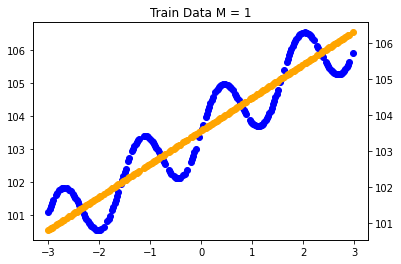

the r-squared for test data is: 0.8383960068805987


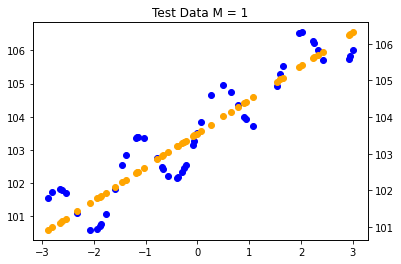

the r-squared for train data is: 0.8531587797431381


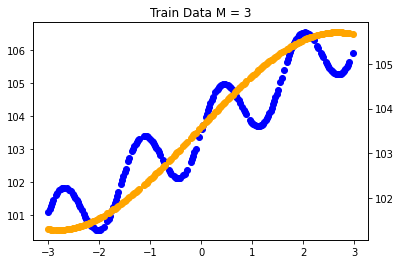

the r-squared for test data is: 0.854365775497019


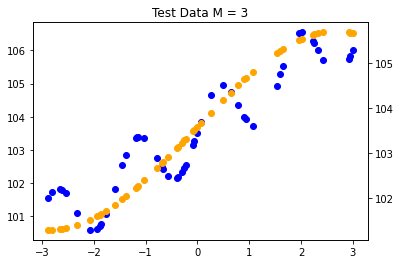

the r-squared for train data is: 0.8715270575872884


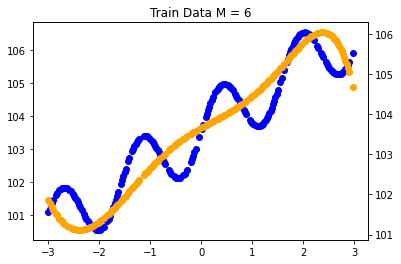

the r-squared for test data is: 0.843613200903238


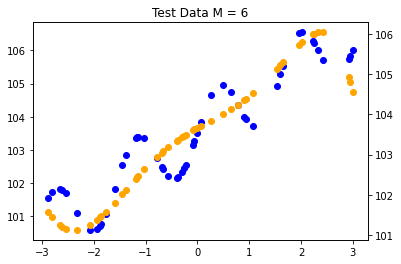

the r-squared for train data is: 0.9371269645906538


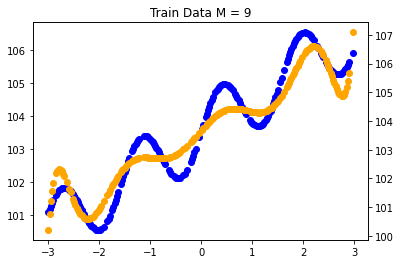

the r-squared for test data is: 0.9083326194406326


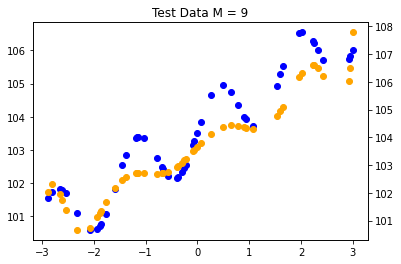

In [145]:
#Plotting the Results
for i in range(len(M)):
    
    w = RegressionTrain(part2Data,M[i])
    RegressionTest(part2Test,M[i],w)

# # Regularization

In [146]:
#I am pre definin lambda in here
alpha = 0.4


# #Training Our Model With Regularization

In [147]:
#In regression train we train our model and show how it works on train data
def RegressionTrainWithRegularization(data,M):

    #We take the training data
    originalx = data["0"]
    Y = data["0.1"]
    
    #This is main regression part We calculate the X matrix with regression in here
    X = []
    for i in range (0,len(data["0"])):
        temparray = []
        temparray.append(1)
        for j in range(1,M+1):
            temparray.append(data["0"][i]**j) 
        X.append(temparray)
    
    #We define unit matrix
    unitMatrix = np.identity(len(X[0]))
        
    #We transform our array to numpy
    X = np.array(X)
    Y = np.array(Y)
    
    #We find regularized w value with this formula (((Xt * X) + lambda*I)**-1) * (X * Y)
    wRegularized = np.linalg.solve(np.dot(X.T, X) + alpha*unitMatrix , np.dot(X.T, Y))
    Yhat = np.dot(X, wRegularized)
    
    #We calculate square error for test data here
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    print("the r-squared for train data is:", r2)
    
    #We can see our model with orange color and original model with blue color on the training data(If you cant see any blue dot it means our predicted value is on the blue )
    ax = plt.subplot()
    ax.scatter(originalx, Y, color="blue", marker="o")
    ax2 = ax.twinx()
    ax2.scatter(originalx, Yhat,color="orange",marker="o")
    title = "Train Data With Regularization M = "+str(M)
    plt.title(title)
    plt.show()
    return wRegularized

# #Test Our Model With Regularization

In [148]:
#IT'S SAME WITH THE REGRESSİONTEST BUT FOR GROUPING I ADDED THIS FUNCTION HERE TOO

#In regression test we only give x values on the test data looking for  relationship between predicted values and original values
def RegressionTestWithRegularization(data,M,w):
    #We take the training data
    originalx = data["0"]
    Y = data["0.1"]
    
    #This is main regression part We calculate the X matrix with regression in here
    X = []
    for i in range (0,len(data["0"])):
        temparray = []
        temparray.append(1)
        for j in range(1,M+1):
            temparray.append(data["0"][i]**j) 
        X.append(temparray)
        
    #We transform our array to numpy
    X = np.array(X)
    Y = np.array(Y)
    
    #We predict our Y values in here with respect to our model
    Ypredicted = np.dot(X, w)

    #We calculate square error for test data here
    d1 = Y - Ypredicted
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    print("the r-squared for test data is:", r2)
    
    #We can see our model with orange color and original model with blue color on the test data(If you cant see any blue dot it means our predicted value is on the blue )
    ax = plt.subplot()
    ax.scatter(originalx, Y, color="blue", marker="o")
    ax2 = ax.twinx()
    ax2.scatter(originalx, Ypredicted,color="orange",marker="o")
    title = "Test Data With Regularization M = "+str(M)
    plt.title(title)
    plt.show()

the r-squared for train data is: 0.8233766716863249


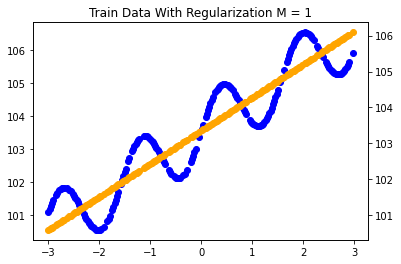

the r-squared for test data is: 0.8284344589102619


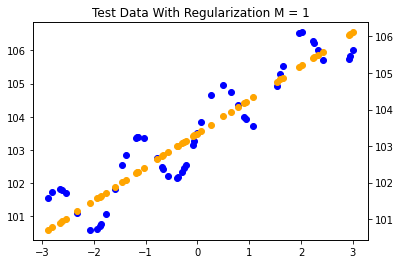

the r-squared for train data is: 0.8213757874562972


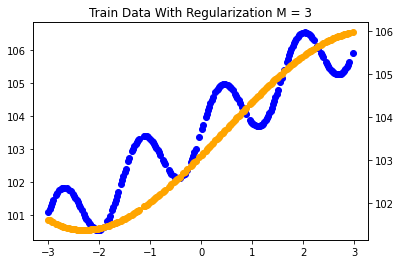

the r-squared for test data is: 0.8426220623620707


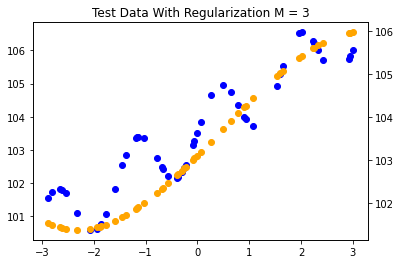

the r-squared for train data is: 0.8032168317598499


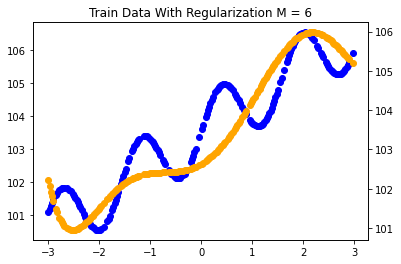

the r-squared for test data is: 0.8356368140974598


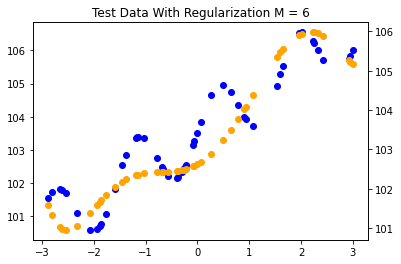

the r-squared for train data is: 0.8543212676322116


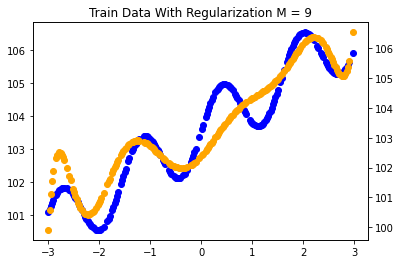

the r-squared for test data is: 0.8797696390596473


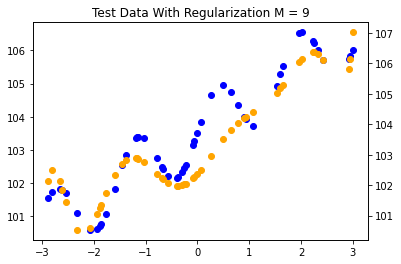

In [149]:
#Plotting the Results
for i in range(len(M)):
    
    wregularized = RegressionTrainWithRegularization(part2Data,M[i])
    RegressionTestWithRegularization(part2Test,M[i],wregularized)

# k-nearest neighbor-density estimate

In [150]:
#We define a k value
k = 7

In [151]:
classifierArrayKNN=[]
for j in range(1,len(testdata.iloc[0])):
    distancedata1 = []
    distancedata2 = []
    distance = []
    testdataloc = [testdata.iloc[0][j],testdata.iloc[1][j]]
    #This for loops look the distance between both classes points and test points
    for i in range(1,data1_len):
        distancedata1.append(math.dist(testdataloc,[data1.iloc[0][i],data1.iloc[1][i]])) 
    for i in range(1,data2_len):
        distancedata2.append(math.dist(testdataloc,[data2.iloc[0][i],data2.iloc[1][i]])) 
        
    #I concatenate two distance array to find minimum distances in both array    
    distance = distancedata1 + distancedata2
    distance.sort()
    
    #We define values to count how many samples in the area belong to class i
    k1count = 0
    k2count = 0
    
    #We are looking for closest k element in both array
    for i in range (k):
        if(distance[i] in distancedata2):
            k2count += 1
        else:
            k1count += 1

    #We calculating the volume
    maxdistance = distance[k-1]
    volume = math.pi * (maxdistance)**2
    
    
    #likelihood = ki/(Ni.V)
    likelihoodclass1 = k1count/(data1_len * volume)
    likelihoodclass2 = k2count/(data2_len * volume)
    
    #prior = Ni/N
    priorclass1 = data1_len/(data1_len + data2_len)
    priorclass2 = data2_len/(data1_len + data2_len)
    
    #Bayesclassifier= ki/k
    bayesclass1 = k1count/k
    bayesclass2 = k2count/k
    
    #Posterior = likelihood * prior = ki/(N.V)
    posteriorclass1 = likelihoodclass1 * priorclass1
    posteriorclass2 = likelihoodclass2 * priorclass2
    
    #Decide the class in values for test data
    
    if(bayesclass1 > bayesclass2):
        classifierArrayKNN.append([testdata.iloc[0][j],testdata.iloc[1][j],1,posteriorclass1,posteriorclass2])
    else:
        classifierArrayKNN.append([testdata.iloc[0][j],testdata.iloc[1][j],2,posteriorclass1,posteriorclass2])
    
classifierArrayKNN = np.array(classifierArrayKNN)

classifierKNNdf = pd.DataFrame(classifierArrayKNN, columns = ['x1','x2','class','posteriorProbability1','posteriorProbability2'])
classifierKNNdf.to_csv('KNN.csv')